In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
#Problem statement:
# To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

#The data set contains the following diseases:
#Actinic keratosis
#Basal cell carcinoma
#Dermatofibroma
#Melanoma
#Nevus
#Pigmented benign keratosis
#Seborrheic keratosis
#Squamous cell carcinoma
#Vascular lesion


In [4]:
#Step :1 Data Reading/Data Understanding
#Defined the path for both train and test images from dataset.
data_dir_train = pathlib.Path('/content/drive/My Drive/app/Train')
data_dir_test = pathlib.Path('/content/drive/My Drive/app/Test')

In [5]:
#Printing the length of jpg images in traininbg directory and test directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
#Step 2 : Dataset creation
#Created train & validation dataset from the train directory with a batch size of 32 .
#Resized images to 180*180.(10%)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


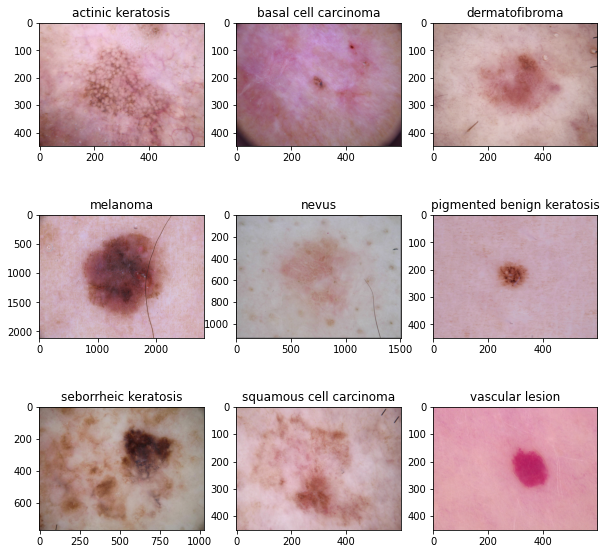

In [10]:
#Step 3: Data visualization
#Created a code to visualize one instance of all the nine classes present in the dataset 
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
#Step 4: Model Building and training
#Created a CNN model, which can accurately detect 9 classes present in the dataset.
#Defined appropriate optimiser and loss function for model training.
#Trained the model for ~20 epochs.
#Explained the findings after the model fit with evidence if the model overfits or underfits.

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 382s 1s/step - loss: 2.0635 - accuracy: 0.1869 - val_loss: 2.0251 - val_accuracy: 0.2506
Epoch 2/20
56/56 [==============================] - 4s 77ms/step - loss: 2.0132 - accuracy: 0.2221 - val_loss: 1.9360 - val_accuracy: 0.2595
Epoch 3/20
56/56 [==============================] - 4s 77ms/step - loss: 1.7986 - accuracy: 0.3566 - val_loss: 1.5875 - val_accuracy: 0.4743
Epoch 4/20
56/56 [==============================] - 4s 77ms/step - loss: 1.6230 - accuracy: 0.4286 - val_loss: 1.5343 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 4s 77ms/step - loss: 1.4769 - accuracy: 0.4883 - val_loss: 1.5740 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5113 - accuracy: 0.4760 - val_loss: 1.4410 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 1.4411 - accuracy: 0.4894 - val_loss: 1.5937 - val_accuracy: 0.4072
Epoch 8/20
56

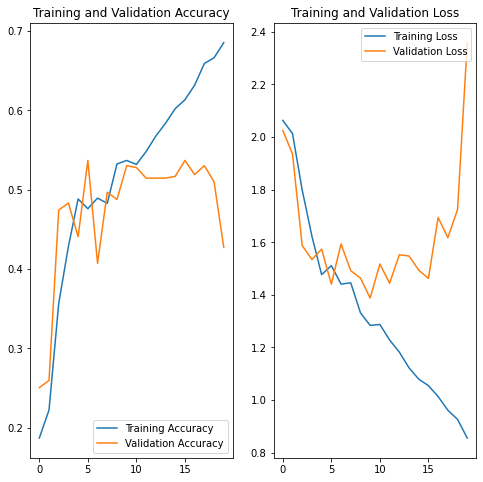

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#Findings:
#The model is overfitting.We can also see difference in loss functions in training & test around the 19th epoch onwards.
#The accuracy for training set is between 68-69 percent whereas for validation set is between 42-43 percent
#It appears to be overfitting as the difference in accuracy on training and validation set is significant.For validation set the accuracy is low.

In [18]:
#Step 5 : Data Augmentation 

In [19]:
dataAugmentation = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

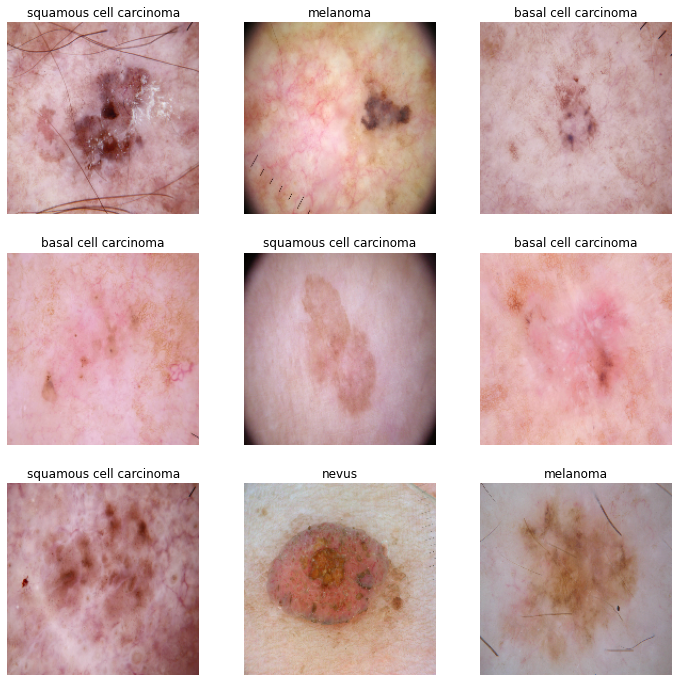

In [21]:
#Visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(dataAugmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [24]:
#Step 6: Model building and Training
#Created a CNN model, which can accurately detect 9 classes present in the dataset.
#Defined appropriate optimiser and loss function for model training.
#Trained the model for ~20 epochs.
#Explained the findings after the model fit with evidence if the earlier issue is resolved or not.

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ dataAugmentation,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [25]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
#Visualise for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 7s 101ms/step - loss: 2.0577 - accuracy: 0.1914 - val_loss: 1.9868 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 5s 97ms/step - loss: 1.9801 - accuracy: 0.2400 - val_loss: 2.0126 - val_accuracy: 0.2192
Epoch 3/20
56/56 [==============================] - 5s 96ms/step - loss: 1.9608 - accuracy: 0.2416 - val_loss: 1.8828 - val_accuracy: 0.2886
Epoch 4/20
56/56 [==============================] - 5s 96ms/step - loss: 1.8581 - accuracy: 0.3025 - val_loss: 1.9665 - val_accuracy: 0.3110
Epoch 5/20
56/56 [==============================] - 5s 97ms/step - loss: 1.7827 - accuracy: 0.3343 - val_loss: 1.7296 - val_accuracy: 0.3714
Epoch 6/20
56/56 [==============================] - 5s 97ms/step - loss: 1.6983 - accuracy: 0.3789 - val_loss: 1.7360 - val_accuracy: 0.3602
Epoch 7/20
56/56 [==============================] - 5s 97ms/step - loss: 1.6448 - accuracy: 0.4068 - val_loss: 1.6835 - val_accuracy: 0.3960
Epoch 8/20
56/56 [=====

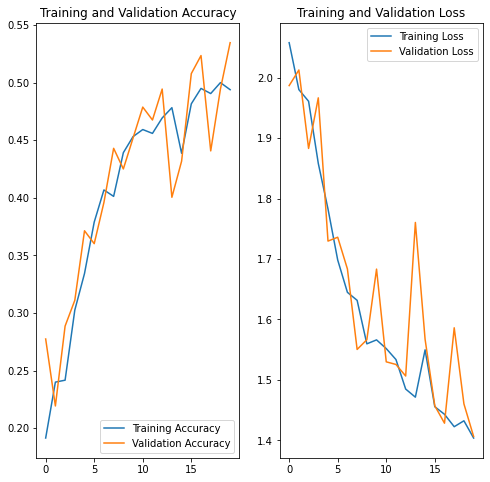

In [27]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Findings
#There is not much improvement in accuracy from the previous model but we can see the overfitting issue getting better due to data augmentation
#The validation set accuracy has become better but still the model can be improved to give better accuracy.

In [28]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/app/Train/actinic kera...,actinic keratosis
1,/content/drive/My Drive/app/Train/actinic kera...,actinic keratosis
2,/content/drive/My Drive/app/Train/actinic kera...,actinic keratosis
3,/content/drive/My Drive/app/Train/actinic kera...,actinic keratosis
4,/content/drive/My Drive/app/Train/actinic kera...,actinic keratosis
...,...,...
2234,/content/drive/My Drive/app/Train/vascular les...,vascular lesion
2235,/content/drive/My Drive/app/Train/vascular les...,vascular lesion
2236,/content/drive/My Drive/app/Train/vascular les...,vascular lesion
2237,/content/drive/My Drive/app/Train/vascular les...,vascular lesion


<BarContainer object of 9 artists>

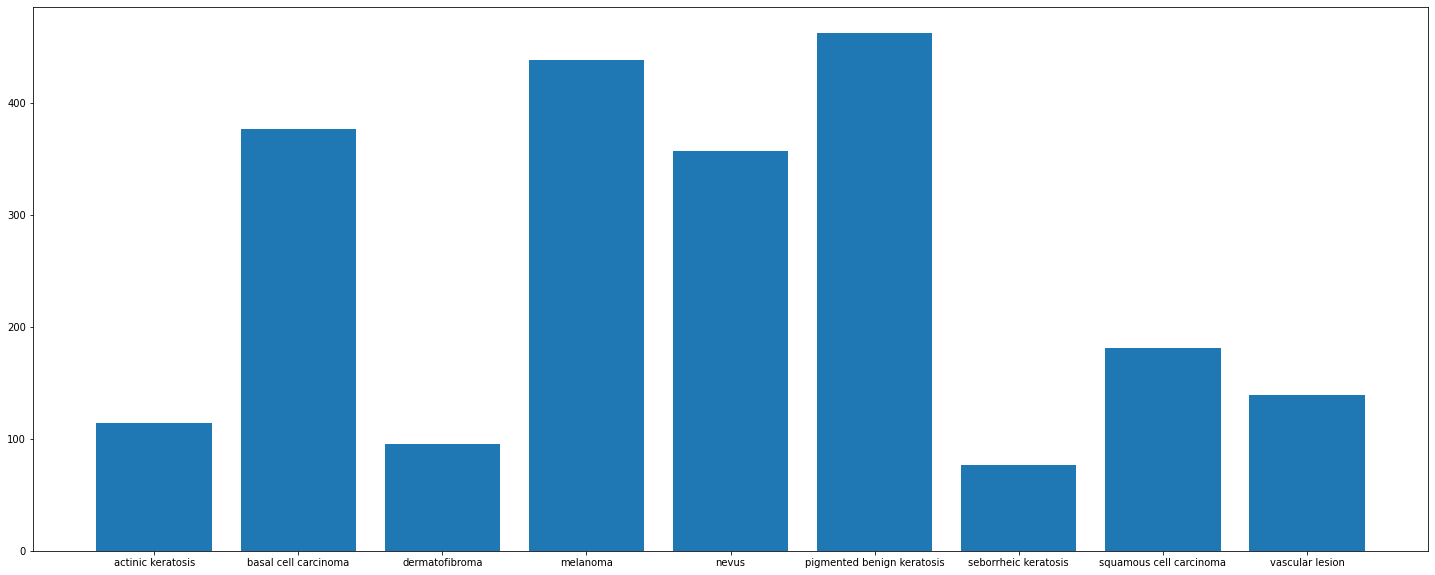

In [29]:
#Step 7 :Examine the current class distribution in the training dataset & explain the following
#Which class has the least number of samples?
#Which classes dominate the data in terms of the proportionate number of samples?

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [ ]:
#Findings 

#- Which class has the least number of samples?
# Ans - Seborrheic keratosis has the least number of samples

#- Which classes dominate the data in terms proportionate number of samples?
# Ans - Pigmented benign keratosis, nevus, melanoma and basal cell carcinoma dominate the data in terms of number of samples

In [30]:
#Installing Augmentor

!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
#Step 8: Handling clas imbalances
#Rectified class imbalances present in the training dataset with Augmentor library

path_to_training_dataset='/content/drive/My Drive/app/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F622D99F940>: 100%|██████████| 500/500 [00:17<00:00, 28.62 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F62ACE462B0>: 100%|██████████| 500/500 [00:18<00:00, 27.25 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F624607C0D0>: 100%|██████████| 500/500 [00:18<00:00, 27.69 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F62BB72AC70>: 100%|██████████| 500/500 [01:29<00:00,  5.60 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F62ACB994C0>: 100%|██████████| 500/500 [01:19<00:00,  6.33 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6230467040>: 100%|██████████| 500/500 [00:17<00:00, 27.90 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F62B452B850>: 100%|██████████| 500/500 [00:42<00:00, 11.82 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F622EA87070>: 100%|██████████| 500/500 [00:18<00:00, 27.32 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/app/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F62ACDB6520>: 100%|██████████| 500/500 [00:19<00:00, 25.43 Samples/s]


In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [57]:
from glob import glob
import os


In [62]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

     

['/content/drive/My Drive/app/Train/vascular lesion/output/vascular lesion_original_ISIC_0029448.jpg_a9cef542-5225-4c84-8d95-293cdc6f7862.jpg',
 '/content/drive/My Drive/app/Train/vascular lesion/output/vascular lesion_original_ISIC_0025612.jpg_5e6863f1-c9fd-4d35-882e-17c595f4bbbd.jpg',
 '/content/drive/My Drive/app/Train/vascular lesion/output/vascular lesion_original_ISIC_0032919.jpg_ec63c481-50fc-48e3-944f-ccc42ed8ab65.jpg',
 '/content/drive/My Drive/app/Train/vascular lesion/output/vascular lesion_original_ISIC_0032076.jpg_0ef7173f-461b-425c-83b6-48172b580380.jpg',
 '/content/drive/My Drive/app/Train/vascular lesion/output/vascular lesion_original_ISIC_0033254.jpg_a5b1197f-07ce-4cad-9df9-f1531c700933.jpg',
 '/content/drive/My Drive/app/Train/vascular lesion/output/vascular lesion_original_ISIC_0033135.jpg_a1ba68cc-2a93-4f6d-9f96-aa8c30c6c177.jpg',
 '/content/drive/My Drive/app/Train/vascular lesion/output/vascular lesion_original_ISIC_0027563.jpg_eb137440-0791-4daa-9296-99e4908d38c

In [63]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [64]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [65]:

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
     

In [66]:

new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [67]:
batch_size = 32
img_height = 180
img_width = 180

In [69]:
data_dir_train= pathlib.Path('/content/drive/My Drive/app/Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [70]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [71]:
#Step 9 : Model Building and training
#Created a CNN model, which can accurately detect 9 classes present in the dataset.
#Defined appropriate optimiser and loss function for model training.
#Trained the model for ~20 epochs.
#Explained the findings after the model fit with evidence if the model overfits or underfits.

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [72]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [75]:
#Visualise over 30 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 35s 202ms/step - loss: 1.7683 - accuracy: 0.3233 - val_loss: 1.7521 - val_accuracy: 0.3497
Epoch 2/30
169/169 [==============================] - 34s 198ms/step - loss: 1.5868 - accuracy: 0.3913 - val_loss: 1.4899 - val_accuracy: 0.4306
Epoch 3/30
169/169 [==============================] - 33s 192ms/step - loss: 1.4542 - accuracy: 0.4377 - val_loss: 1.4165 - val_accuracy: 0.4514
Epoch 4/30
169/169 [==============================] - 33s 192ms/step - loss: 1.3539 - accuracy: 0.4824 - val_loss: 1.2508 - val_accuracy: 0.5189
Epoch 5/30
169/169 [==============================] - 33s 192ms/step - loss: 1.2783 - accuracy: 0.5085 - val_loss: 1.2234 - val_accuracy: 0.5197
Epoch 6/30
169/169 [==============================] - 36s 206ms/step - loss: 1.1809 - accuracy: 0.5529 - val_loss: 1.1905 - val_accuracy: 0.5167
Epoch 7/30
169/169 [==============================] - 34s 193ms/step - loss: 1.0818 - accuracy: 0.5931 - val_loss: 1.0981 - val_ac

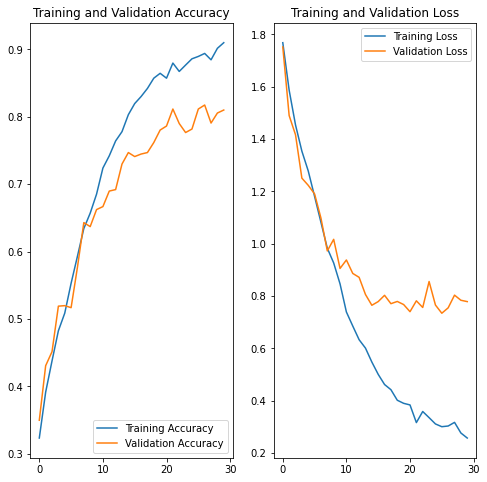

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Findings

#Model 1: First we built the model without data augmentation.We saw that the model was overfitting. 

#Model 2: Then we did data augmentation and saw how the overfitting issue became better.

#Model 3: Finally we tried to balance classes with the help of augmenter library and saw that our overfitting issue got resolved with the model giving a good accuracy over 
#training and validation set.
#Also there is not much difference in the accuracies of both the training and validation set
#34s 195ms/step - loss: 0.2579 - accuracy: 0.9099 - val_loss: 0.7791 - val_accuracy: 0.8099